In [3]:
import pandas as pd

In [4]:
test = pd.read_csv('../Test Data/most-recent-event.csv').loc[:, ["R_fighter", "R_odds", "R_ev", "R_avg_SIG_STR_pct", "R_avg_TD_pct", "R_current_win_streak",
                                                    "r_ko_odds", "r_sub_odds",
                            
                                                    "B_fighter", "B_odds", "B_ev", "B_avg_SIG_STR_pct", "B_avg_TD_pct", "B_current_win_streak",
                                                    "b_ko_odds", "b_sub_odds",
                                                    "Winner"]]

In [5]:
test.head()

,R_fighter,R_odds,R_ev,R_avg_SIG_STR_pct,R_avg_TD_pct,R_current_win_streak,r_ko_odds,r_sub_odds,B_fighter,B_odds,B_ev,B_avg_SIG_STR_pct,B_avg_TD_pct,B_current_win_streak,b_ko_odds,b_sub_odds,Winner
0,Dustin Poirier,-129,77.519380,0.50,0.36,2,165,575,Conor McGregor,100,100.000000,0.49,0.55,0,150,2200,Red
1,Gilbert Burns,130,130.000000,0.46,0.36,0,525,475,Stephen Thompson,-162,61.728395,0.43,0.45,2,250,2500,Red
2,Tai Tuivasa,-130,76.923077,0.50,0.00,2,160,1600,Greg Hardy,105,105.000000,0.50,0.33,0,265,1800,Red
3,Irene Aldana,-107,93.457944,0.39,0.50,0,425,1200,Yana Kunitskaya,-115,86.956522,0.56,0.53,2,800,1200,Red
4,Sean O'Malley,-1000,10.000000,0.62,0.50,1,-300,800,Kris Moutinho,580,580.000000,0.32,0.00,0,1200,1600,Red


In [6]:
X_test = test.drop(["R_fighter", "B_fighter", "Winner"], axis=1)

In [7]:
X_test

,R_odds,R_ev,R_avg_SIG_STR_pct,R_avg_TD_pct,R_current_win_streak,r_ko_odds,r_sub_odds,B_odds,B_ev,B_avg_SIG_STR_pct,B_avg_TD_pct,B_current_win_streak,b_ko_odds,b_sub_odds
0,-129,77.519380,0.50,0.36,2,165,575,100,100.000000,0.49,0.55,0,150,2200
1,130,130.000000,0.46,0.36,0,525,475,-162,61.728395,0.43,0.45,2,250,2500
2,-130,76.923077,0.50,0.00,2,160,1600,105,105.000000,0.50,0.33,0,265,1800
3,-107,93.457944,0.39,0.50,0,425,1200,-115,86.956522,0.56,0.53,2,800,1200
4,-1000,10.000000,0.62,0.50,1,-300,800,580,580.000000,0.32,0.00,0,1200,1600
5,150,150.000000,0.39,0.46,2,700,1100,-190,52.631579,0.49,0.53,2,275,1000
6,150,150.000000,0.41,0.20,0,295,1400,-186,53.763441,0.55,0.62,2,200,650
7,185,185.000000,0.44,0.11,4,1100,375,-235,42.553191,0.48,0.55,2,165,925
8,-106,94.339623,0.54,0.80,3,450,1000,-118,84.745763,0.48,0.50,1,300,425
9,-200,50.000000,0.38,0.50,0,900,625,162,162.000000,0.36,0.44,0,1000,1200


In [8]:
y_test = test.loc[:, "Winner"]

In [9]:
from joblib import load

In [10]:
scaler = load('../Model and Scaler/final_scaler.joblib')

In [11]:
scaled_X_test = scaler.transform(X_test)

In [12]:
svc = load('../Model and Scaler/final_svc.joblib')

In [13]:
pred = svc.predict(scaled_X_test)
pred

array(['Red', 'Blue', 'Red', 'Blue', 'Red', 'Blue', 'Blue', 'Blue',
       'Blue', 'Red', 'Blue', 'Red'], dtype=object)

In [14]:
svc.predict_proba(scaled_X_test)

array([[0.3522882 , 0.6477118 ],
       [0.50982061, 0.49017939],
       [0.39675913, 0.60324087],
       [0.5       , 0.5       ],
       [0.25724874, 0.74275126],
       [0.65961612, 0.34038388],
       [0.64866679, 0.35133321],
       [0.60722097, 0.39277903],
       [0.4560249 , 0.5439751 ],
       [0.318194  , 0.681806  ],
       [0.62423244, 0.37576756],
       [0.23355569, 0.76644431]])

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, plot_confusion_matrix

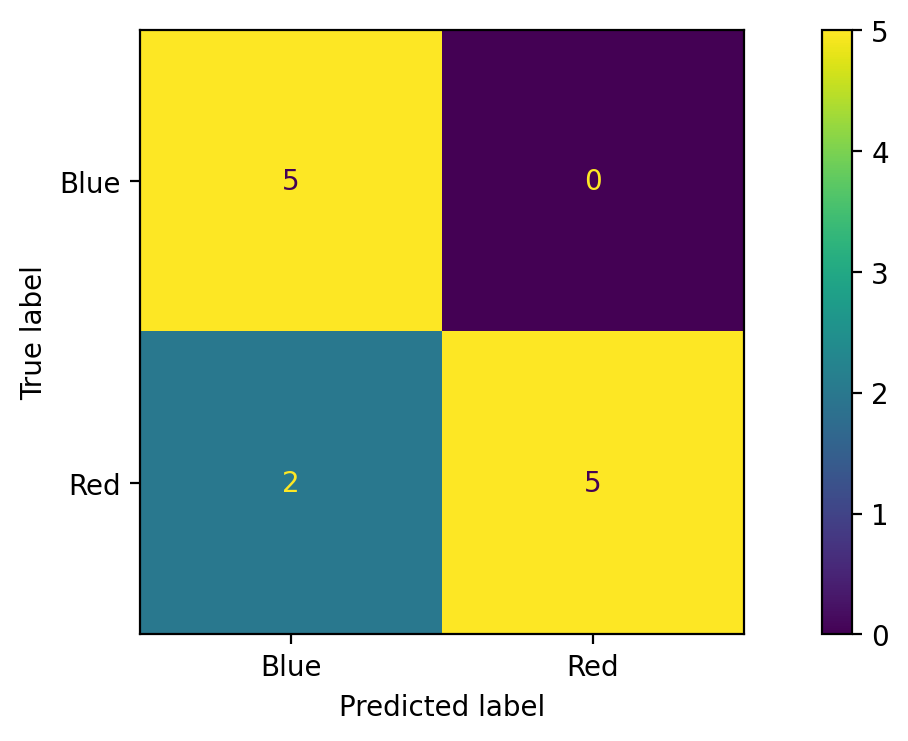

In [16]:
fig, ax = plt.subplots(figsize=(10, 4), dpi=200)
plot_confusion_matrix(svc, scaled_X_test, y_test, ax=ax)

In [17]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

        Blue       0.71      1.00      0.83         5
         Red       1.00      0.71      0.83         7

    accuracy                           0.83        12
   macro avg       0.86      0.86      0.83        12
weighted avg       0.88      0.83      0.83        12

